# Exercise with Natural Language Processing

For todays exersice we will be doing two things.  The first is to build the same model with the same data that we did in the lecture, the second will be to build a new model with new data. 

## PART 1: 
- 20 Newsgroups Corpus
0. Inspect data
0. Clean and Process Text
0. Vectorize your text
0. Classify your text using Multinomial Naive Bayes
0. Classify your text using Random Forest. 
0. Eval your models.  
0. Classify a NEW PIECE of text. Any string you want to feed it. 


## PART 2:
- Republican vs Democrat Tweet Classifier
0.  This is self guided, can you get a f1 above 82%?  -its not easy.

In [1]:
## IMPORT YOUR LIBS HERE
# Import pandas for data handling
import pandas as pd

# NLTK is our Natural-Language-Took-Kit
import nltk
from nltk.corpus import stopwords
from nltk import word_tokenize
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet

# Libraries for helping us with strings
import string
# Regular Expression Library
import re

# Import our text vectorizers
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer


# Import our classifiers
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier


# Import some ML helper function
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report

# Import our metrics to evaluate our model
from sklearn import metrics


# Library for plotting
import matplotlib.pyplot as plt
import seaborn as sns

# You may need to download these from nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
stopwords = stopwords.words('english')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/alinaalizai/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/alinaalizai/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/alinaalizai/nltk_data...


## Load and display data.
1. Load the 20-newsgroups.csv data into a dataframe.
1. Print the shape
1. Inspect / remove nulls and duplicates
1. Find class balances, print out how many of each topic_category there are.

In [2]:
# 1. Load the 20-newsgroups.csv data into a dataframe.
# 2. Print the shape

df = pd.read_csv('data/20-newsgroups.csv')
print(df.shape)
df.head()

(11314, 4)


,id,message,topic,topic_category
0,0,From: lerxst@wam.umd.edu (where's my thing)\r\...,7,rec.autos
1,1,From: guykuo@carson.u.washington.edu (Guy Kuo)...,4,comp.sys.mac.hardware
2,2,From: twillis@ec.ecn.purdue.edu (Thomas E Will...,4,comp.sys.mac.hardware
3,3,From: jgreen@amber (Joe Green)\r\nSubject: Re:...,1,comp.graphics
4,4,From: jcm@head-cfa.harvard.edu (Jonathan McDow...,14,sci.space


In [3]:
# 3. Inspect / remove nulls and duplicates

print(df.isnull().sum())

id                0
message           0
topic             0
topic_category    0
dtype: int64


In [4]:
print(df.duplicated().sum())

0


In [5]:
# 4. Find class balances, print out how many of each topic_category there are.
df.topic_category.value_counts()

topic_category
rec.sport.hockey            600
soc.religion.christian      599
rec.motorcycles             598
rec.sport.baseball          597
sci.crypt                   595
rec.autos                   594
sci.med                     594
comp.windows.x              593
sci.space                   593
comp.os.ms-windows.misc     591
sci.electronics             591
comp.sys.ibm.pc.hardware    590
misc.forsale                585
comp.graphics               584
comp.sys.mac.hardware       578
talk.politics.mideast       564
talk.politics.guns          546
alt.atheism                 480
talk.politics.misc          465
talk.religion.misc          377
Name: count, dtype: int64

# Text Pre-Processing 
(aka Feature engineering)
1. Make a function that makes all text lowercase.
    * Do a sanity check by feeding in a test sentence into the function. 
    
    
2. Make a function that removes all punctuation. 
    * Do a sanity check by feeding in a test sentence into the function. 
    
0. EXTRA CREDIT:  
    0. Make a function that stemms all words. 
    0. Make a function that removes all stopwords.

5. Mandatory: Make a pipeline function that applys all the text processing functions you just built.
    * Do a sanity check by feeding in a test sentence into the pipeline. 
    
6. Mandatory: Use `df['message_clean'] = df[column].apply(???)` and apply the text pipeline to your text data column. 

In [6]:
# 1. Make a function that makes all text lowercase.

test_string = 'This is A SENTENCE with LOTS OF CAPS.'

def make_lower (input_string):
    return input_string.lower()

print(make_lower(test_string))


this is a sentence with lots of caps.


In [7]:
# 2. Make a function that removes all punctuation. 
test_string = 'This is a sentence! 50 With lots of punctuation??? & other #things.'

def remove_punctuation(a_string):    
    a_string = re.sub(r'[^\w\s]','',a_string)
    return a_string

print(remove_punctuation(test_string))


This is a sentence 50 With lots of punctuation  other things


In [8]:
# 3. Make a function that removes all stopwords.

test_string = 'This is a sentence! With some different stopwords i have added in here.'

def remove_stopwords(a_string):
    # Break the sentence down into a list of words
    words = word_tokenize(a_string)
    
    # Make a list to append valid words into
    valid_words = []
    
    # Loop through all the words
    for word in words:
        
        # Check if word is not in stopwords
        if word not in stopwords:
            
            # If word not in stopwords, append to our valid_words
            valid_words.append(word)

    # Join the list of words together into a string
    a_string = ' '.join(valid_words)

    return a_string
            
remove_stopwords(test_string)


'This sentence ! With different stopwords added .'

In [9]:
# 4. EXTRA CREDIT: Make a function that stemms all words. 

test_string = 'I played and started playing with players and we all love to play with plays'

def stem_words(a_string):
    # Initalize our Stemmer
    porter = PorterStemmer()
    
    # Break the sentence down into a list of words
    words = word_tokenize(a_string)
    
    # Make a list to append valid words into
    valid_words = []

    # Loop through all the words
    for word in words:
        # Stem the word
        stemmed_word = porter.stem(word)
        
        # Append stemmed word to our valid_words
        valid_words.append(stemmed_word)
        
    # Join the list of words together into a string
    a_string = ' '.join(valid_words)

    return a_string 

stem_words(test_string)

'i play and start play with player and we all love to play with play'

In [11]:
# 5. MANDATORY: Make a pipeline function that applys all the text processing functions you just built.

test_string = 'I played and started playing with players and we all love to play with plays'

def text_pipeline(input_string):
    input_string = make_lower(input_string)
    input_string = remove_punctuation(input_string)
    #input_string = remove_stopwords(input_string)
  
    return input_string

text_pipeline(test_string)


'i played and started playing with players and we all love to play with plays'

In [13]:
# 6. Mandatory: Use `df[column].apply(???)` and apply the text pipeline to your text data column. 

df['message_clean'] = df['message'].apply(text_pipeline)


print("ORIGINAL TEXT:\n", df['message'][0])
print('-'*999)
print("CLEANDED TEXT:\n", df['message_clean'][0])

ORIGINAL TEXT:
 From: lerxst@wam.umd.edu (where's my thing)
Subject: WHAT car is this!?
Nntp-Posting-Host: rac3.wam.umd.edu
Organization: University of Maryland, College Park
Lines: 15

 I was wondering if anyone out there could enlighten me on this car I saw
the other day. It was a 2-door sports car, looked to be from the late 60s/
early 70s. It was called a Bricklin. The doors were really small. In addition,
the front bumper was separate from the rest of the body. This is 
all I know. If anyone can tellme a model name, engine specs, years
of production, where this car is made, history, or whatever info you
have on this funky looking car, please e-mail.

Thanks,
- IL
   ---- brought to you by your neighborhood Lerxst ----





----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

# Text Vectorization

1. Define your `X` and `y` data. 


2. Initialize a vectorizer (you can use TFIDF or BOW, it is your choice).
    * Do you want to use n-grams..?


3. Fit your vectorizer using your X data.
    * Remember, this process happens IN PLACE.


4. Transform your X data using your fitted vectorizer. 
    * `X = vectorizer.???`



5. Print the shape of your X.  How many features (aka columns) do you have?

In [14]:
# 0. Define your `X` and `y` data. 

X = df['message_clean']

y = df['topic_category']

In [15]:
# 1. Train test split your data.
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y)


# Save the raw text for later just incase
X_train_text = X_train
X_test_text = X_test

print(df.shape, len(X_train_text))

(11314, 5) 9051


In [16]:
# 2. Initialize a vectorizer (you can use TFIDF or BOW, it is your choice).
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize our vectorizer
vectorizer = TfidfVectorizer()


In [17]:
# 3. Fit your vectorizer using your X data

# This makes your vocab matrix
vectorizer.fit(X_train)

TfidfVectorizer()

In [18]:
# 4. Transform your X data using your fitted vectorizer. 

X_train = vectorizer.transform(X_train)
X_test = vectorizer.transform(X_test)


In [19]:
# 5. Print the shape of your X.  How many features (aka columns) do you have?

print(X_train.shape, type(X_train))

(9051, 122023) <class 'scipy.sparse._csr.csr_matrix'>


___
# Build and Train Model
Use Multinomial Naive Bayes to classify these documents. 

1. Initalize an empty model. 
2. Fit the model with our training data.


Experiment with different alphas.  Use the alpha gives you the best result.

EXTRA CREDIT:  Use grid search to programmatically do this for you. 

In [20]:
# 1. Initalize an empty model. 

model = MultinomialNB()


In [21]:
# Fit our model with our training data.

model.fit(X_train, y_train)


MultinomialNB()

# Evaluate the model.

1. Make new predicitions using our test data. 
2. Print the accuracy of the model. 
3. Print the confusion matrix of our predictions. 
4. Using `classification_report` print the evaluation results for all the classes. 



In [22]:
# 1. Make new predictions of our testing data. 

# Make new predictions of our testing data. 
y_pred = model.predict(X_test)


# Make predicted probabilites of our testing data
y_pred_proba = model.predict_proba(X_test)


In [23]:
# 2. Print the accuracy of the model. 
accuracy = model.score(X_test, y_test)

print("Model Accuracy: %f" % accuracy)

Model Accuracy: 0.840035


In [24]:
# 3. Plot the confusion matrix of our predictions
# you can use Sklearns `ConfusionMatrixDisplay`
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred, target_names=model.classes_))


                          precision    recall  f1-score   support

             alt.atheism       0.89      0.60      0.72        96
           comp.graphics       0.89      0.79      0.84       117
 comp.os.ms-windows.misc       0.87      0.84      0.85       118
comp.sys.ibm.pc.hardware       0.72      0.79      0.75       118
   comp.sys.mac.hardware       0.92      0.90      0.91       115
          comp.windows.x       0.91      0.86      0.88       119
            misc.forsale       0.86      0.57      0.69       117
               rec.autos       0.85      0.93      0.89       119
         rec.motorcycles       0.98      0.93      0.96       120
      rec.sport.baseball       0.97      0.94      0.96       119
        rec.sport.hockey       0.92      1.00      0.96       120
               sci.crypt       0.69      0.99      0.81       119
         sci.electronics       0.92      0.79      0.85       118
                 sci.med       1.00      0.89      0.94       119
         

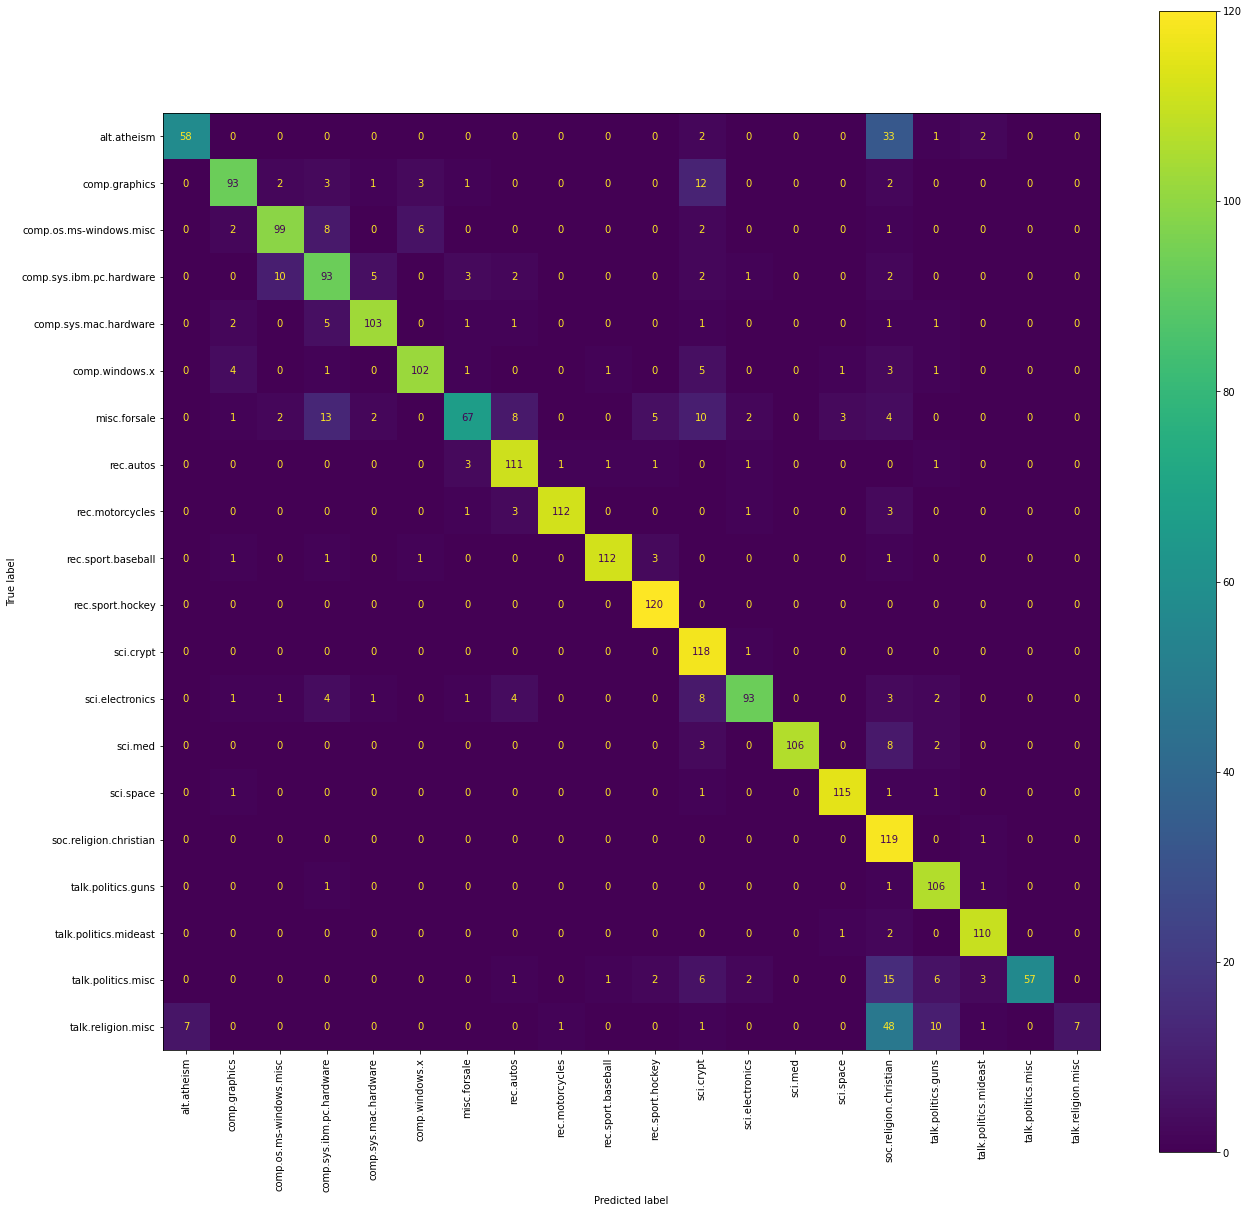

In [25]:
# 4. Using `classification_report` print the evaluation results for all the classes. 

# Plot the confusion matrix of our results
fig, ax = plt.subplots(figsize=(21, 21))
disp = ConfusionMatrixDisplay.from_estimator(model, X_test, y_test, ax=ax);
plt.xticks(rotation=90);


# Manual predicition
Write a new sentence that you think will be classified as talk.politics.guns. 
1. Apply the text pipeline to your sentence
2. Transform your cleaned text using the `X = vectorizer.transform([your_text])`
    * Note, the `transform` function accepts a list and not a individual string.
3. Use the model to predict your new `X`. 
4. Print the prediction

In [29]:
new_text = 'Almost all of the school shootings could have been prevented if there were stricter gun control laws!!'

# 1. Apply the text pipeline to your sentence
new_text = text_pipeline(my_sentence)
print(sentence)

# 2. Transform your cleaned text using the `X = vectorizer.transform([your_text])`\

new_text_vectorized = vectorizer.transform([new_text])
new_text_vectorized

# 3. Use the model to predict your new `X`. 

model.predict(new_text_vectorized)

# Print the predicted probabilies for each class
pp = model.predict_proba(new_text_vectorized)

# Print probabilities for that predicition
for class_name, percentage in zip(model.classes_, pp.round(3)[0]):
    print(class_name, percentage )
    

almost all of the school shootings could have been prevented if there were stricter gun control laws
alt.atheism 0.053
comp.graphics 0.021
comp.os.ms-windows.misc 0.029
comp.sys.ibm.pc.hardware 0.027
comp.sys.mac.hardware 0.032
comp.windows.x 0.023
misc.forsale 0.017
rec.autos 0.042
rec.motorcycles 0.034
rec.sport.baseball 0.035
rec.sport.hockey 0.033
sci.crypt 0.059
sci.electronics 0.035
sci.med 0.044
sci.space 0.042
soc.religion.christian 0.059
talk.politics.guns 0.291
talk.politics.mideast 0.059
talk.politics.misc 0.048
talk.religion.misc 0.018


___
# PART 2: Twitter Data
This part of the exercise is un-guided on purpose.  

Using the `dem-vs-rep-tweets.csv` build a classifier to determine if a tweet was written by a democrat or republican. 

Can you get an f1-score higher than %82

In [30]:
# 1. Load the 20-newsgroups.csv data into a dataframe.
# 2. Print the shape
df = pd.read_csv('data/dem-vs-rep-tweets.csv')

print(df.shape)
df.head()


(86460, 3)


,Party,Handle,Tweet
0,Democrat,RepDarrenSoto,"Today, Senate Dems vote to #SaveTheInternet. P..."
1,Democrat,RepDarrenSoto,RT @WinterHavenSun: Winter Haven resident / Al...
2,Democrat,RepDarrenSoto,RT @NBCLatino: .@RepDarrenSoto noted that Hurr...
3,Democrat,RepDarrenSoto,RT @NALCABPolicy: Meeting with @RepDarrenSoto ...
4,Democrat,RepDarrenSoto,RT @Vegalteno: Hurricane season starts on June...


In [31]:
print(df.isnull().sum())

Party     0
Handle    0
Tweet     0
dtype: int64


In [32]:
print(df.duplicated().sum())

57


In [34]:
df.Party.value_counts()

Party
Republican    44392
Democrat      42068
Name: count, dtype: int64

In [35]:
test_string = 'I played and started playing with players and we all love to play with plays'

def text_pipeline(input_string):
    input_string = make_lower(input_string)
    input_string = remove_punctuation(input_string)
    #input_string = remove_stopwords(input_string)
  
    return input_string

text_pipeline(test_string)


'i played and started playing with players and we all love to play with plays'

In [36]:
df['Tweet_Clean'] = df['Tweet'].apply(text_pipeline)


print("ORIGINAL TEXT:\n", df['Tweet'][0])
print('-'*999)
print("CLEANDED TEXT:\n", df['Tweet_Clean'][0])

ORIGINAL TEXT:
 Today, Senate Dems vote to #SaveTheInternet. Proud to support similar #NetNeutrality legislation here in the House… https://t.co/n3tggDLU1L
----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

In [37]:
X = df['Tweet_Clean']

y = df['Party']

In [39]:
# Split our data into testing and training like always. 
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y)


# Save the raw text for later just incase
X_train_text = X_train
X_test_text = X_test

print(df.shape, len(X_train_text))

(86460, 4) 69168


In [40]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize our vectorizer
vectorizer = TfidfVectorizer()

# This makes your vocab matrix
vectorizer.fit(X_train)

# This transforms your documents into vectors.
X_train = vectorizer.transform(X_train)
X_test = vectorizer.transform(X_test)

In [41]:
print(X_train.shape, type(X_train))

(69168, 112381) <class 'scipy.sparse._csr.csr_matrix'>


In [42]:
model = MultinomialNB()

model.fit(X_train, y_train)


MultinomialNB()

In [43]:
# Make new predictions of our testing data. 
y_pred = model.predict(X_test)


# Make predicted probabilites of our testing data
y_pred_proba = model.predict_proba(X_test)


In [45]:
#Print the accuracy of the model. 
accuracy = model.score(X_test, y_test)

print("Model Accuracy: %f" % accuracy)

Model Accuracy: 0.802625


In [46]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred, target_names=model.classes_))

              precision    recall  f1-score   support

    Democrat       0.83      0.75      0.79      8414
  Republican       0.78      0.85      0.82      8878

    accuracy                           0.80     17292
   macro avg       0.81      0.80      0.80     17292
weighted avg       0.80      0.80      0.80     17292



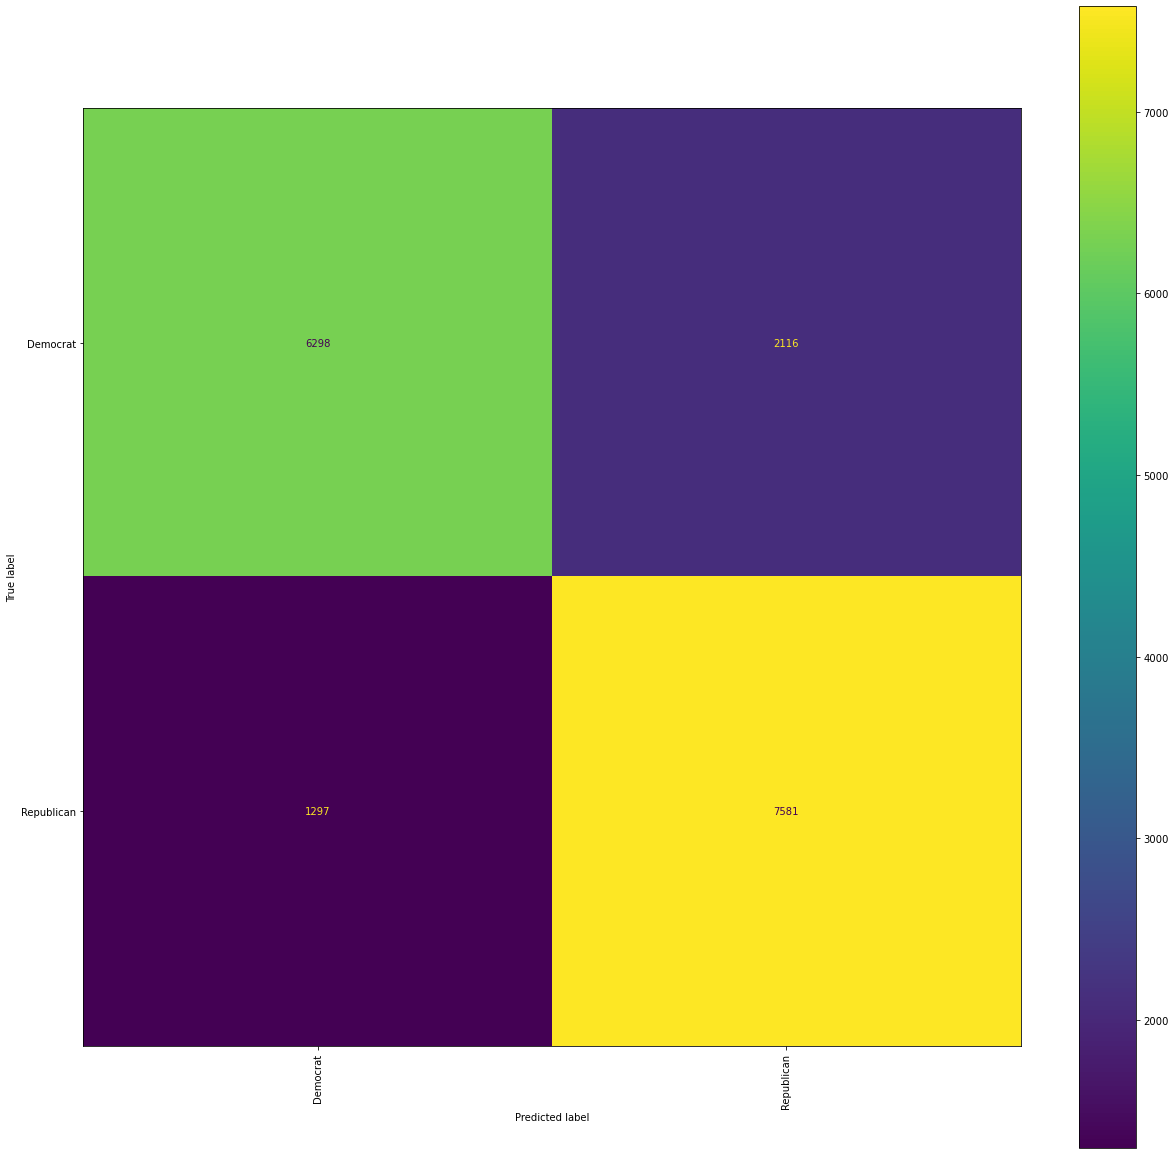

In [47]:
fig, ax = plt.subplots(figsize=(21, 21))
disp = ConfusionMatrixDisplay.from_estimator(model, X_test, y_test, ax=ax);
plt.xticks(rotation=90);

In [48]:
new_text = 'Everyones voice should be heard and there shouldnt be any law made that goes against a Americans fundamental rights'

 
new_text = text_pipeline(new_text)

# Sanity check
print(new_text)

new_text_vectorized = vectorizer.transform([new_text])
new_text_vectorized

model.predict(new_text_vectorized)

everyones voice should be heard and there shouldnt be any law made that goes against a americans fundamental rights


array(['Democrat'], dtype='<U10')

In [49]:

pp = model.predict_proba(new_text_vectorized)
# Print probabilities for that predicition
for class_name, percentage in zip(model.classes_, pp.round(3)[0]):
    print(class_name, percentage )

Democrat 0.698
Republican 0.302
